# Data cleaning and fitting

In the following we will use a real data set to build a simple linear regression model. To begin with, we have to clean the data set. This necessitates making assumptions in the relevance and irrelevance of featrues/dimensions/columns.

To this end, we simply use information about the data frame using pandas and further filter columns by extracting information from pair plots. At the very end, we feed the data into a simple linear regressor. The overall goal for this project is to predict prices of ordinary cars.

In [35]:
#import necessary packages

import urllib3

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

### 1) Loading the data and defining the data frame

In [36]:
url = "http://downloads.codingcoursestv.eu/035%20-%20machine%20learning/data/autos.csv.bz2"

http = urllib3.PoolManager()
download = http.urlopen("GET", url, preload_content = False)  
data = download.read()

with open('autos.csv.bz2', 'wb') as f:  
    f.write(data)

In [37]:
#define data frame

df = pd.read_csv("./autos.csv.bz2", encoding = "iso8859-1")

In [38]:
print(df.shape)

df.head()

(371528, 20)


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [39]:
#info on/summary of df
#df.info()

In [40]:
#further statistical info of the df (potentially not all results relevant and/or meaningful)
#df.describe()

### 2) Data cleaning

In [41]:
#eliminate irrelevant columns
df = df.drop(["dateCrawled", "abtest", "dateCreated", "nrOfPictures", "lastSeen"], axis = 1)

In [42]:
df.head()

,name,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,Golf_3_1.6,privat,Angebot,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,70435
1,A5_Sportback_2.7_Tdi,privat,Angebot,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,66954
2,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,90480
3,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,91074
4,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,60437


In [43]:
#registration columns are important information; need to be brought in useful form
df["monthOfRegistration"] = np.where(df["monthOfRegistration"] == 0, 6, df["monthOfRegistration"])

df["registration"] = df["yearOfRegistration"] + (df["monthOfRegistration"] - 1) / 12

df = df.drop(["yearOfRegistration", "monthOfRegistration"], axis = 1)
df.head()

,name,seller,offerType,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode,registration
0,Golf_3_1.6,privat,Angebot,480,NaN,manuell,0,golf,150000,benzin,volkswagen,NaN,70435,1993.416667
1,A5_Sportback_2.7_Tdi,privat,Angebot,18300,coupe,manuell,190,NaN,125000,diesel,audi,ja,66954,2011.333333
2,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,suv,automatik,163,grand,125000,diesel,jeep,NaN,90480,2004.583333
3,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,kleinwagen,manuell,75,golf,150000,benzin,volkswagen,nein,91074,2001.416667
4,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,kleinwagen,manuell,69,fabia,90000,diesel,skoda,nein,60437,2008.500000


In [44]:
#investigate "seller" column
#df["seller"].describe() #indicates that there are two types of "seller"
#df["seller"].unique() #indicates how these two types are termed
#we deem it unimportant, thus:
df = df.drop(["seller"], axis = 1)

In [45]:
#investigate "offerType" column
#df["offerType"].describe() #indicates that there are few types of "seller"
#df["offerType"].unique() #indicates how these types are termed
#we deem it unimportant, thus:
df = df.drop(["offerType"], axis = 1)

In [46]:
#investigate "price" column
#we see that there are entries where the price was not given and set to 0
#we drop these:
df = df.drop(df[df["price"] == 0].index)

#investigate "powerPS" column
#we see that there are entries where the PS number was not given and set to 0
#we drop these:
df = df.drop(df[df["powerPS"] == 0].index)

df.head()

,name,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode,registration
1,A5_Sportback_2.7_Tdi,18300,coupe,manuell,190,NaN,125000,diesel,audi,ja,66954,2011.333333
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,automatik,163,grand,125000,diesel,jeep,NaN,90480,2004.583333
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,manuell,75,golf,150000,benzin,volkswagen,nein,91074,2001.416667
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,manuell,69,fabia,90000,diesel,skoda,nein,60437,2008.500000
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,manuell,102,3er,150000,benzin,bmw,ja,33775,1995.750000


In [47]:
#investigate "notRepairedDamage" column
#df["notRepairedDamage"].unique() #indicates how many types there are
#we drop these and convert there relevant ones into processable info
df["notRepairedDamage"] = np.where(df["notRepairedDamage"] == "ja", 1, df["notRepairedDamage"])
df["notRepairedDamage"] = np.where(df["notRepairedDamage"] == "nein", 0, df["notRepairedDamage"])
df = df[df["notRepairedDamage"].notnull()]
df.head()

,name,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode,registration
1,A5_Sportback_2.7_Tdi,18300,coupe,manuell,190,NaN,125000,diesel,audi,1,66954,2011.333333
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,manuell,75,golf,150000,benzin,volkswagen,0,91074,2001.416667
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,manuell,69,fabia,90000,diesel,skoda,0,60437,2008.500000
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,manuell,102,3er,150000,benzin,bmw,1,33775,1995.750000
6,Peugeot_206_CC_110_Platinum,2200,cabrio,manuell,109,2_reihe,150000,benzin,peugeot,0,67112,2004.583333


In [48]:
df.shape

(275910, 12)

### 3) First visualizations for further data cleaning

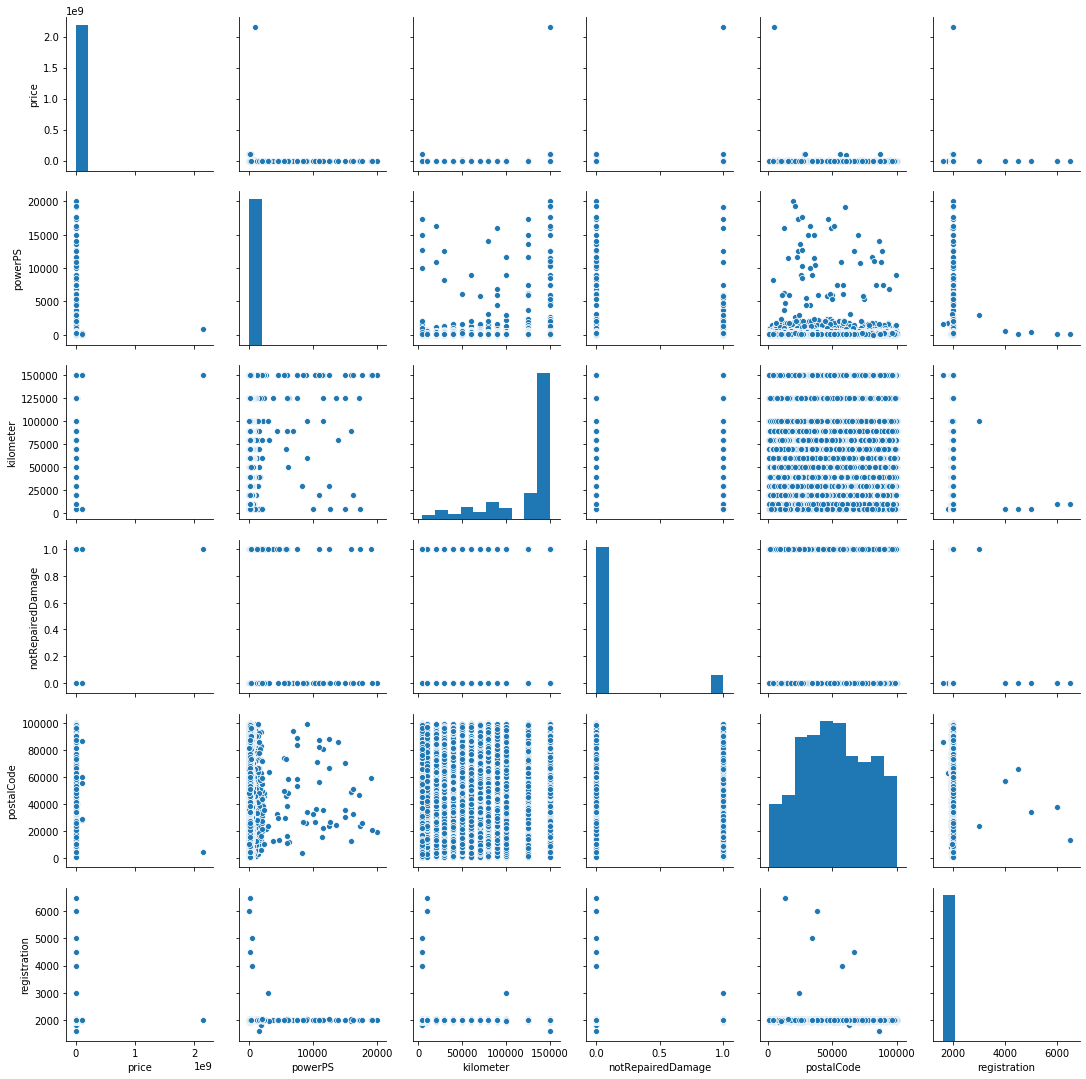

In [49]:
#plotting via pairplot to plot pairwise relationships in a dataset
#the goal is to use this to filter out runaway points

g = sns.pairplot(df)

In [50]:
#there are a few runaway points which can be filtered out
df = df[(df["price"] < 100000) & (df["powerPS"] < 2000)]

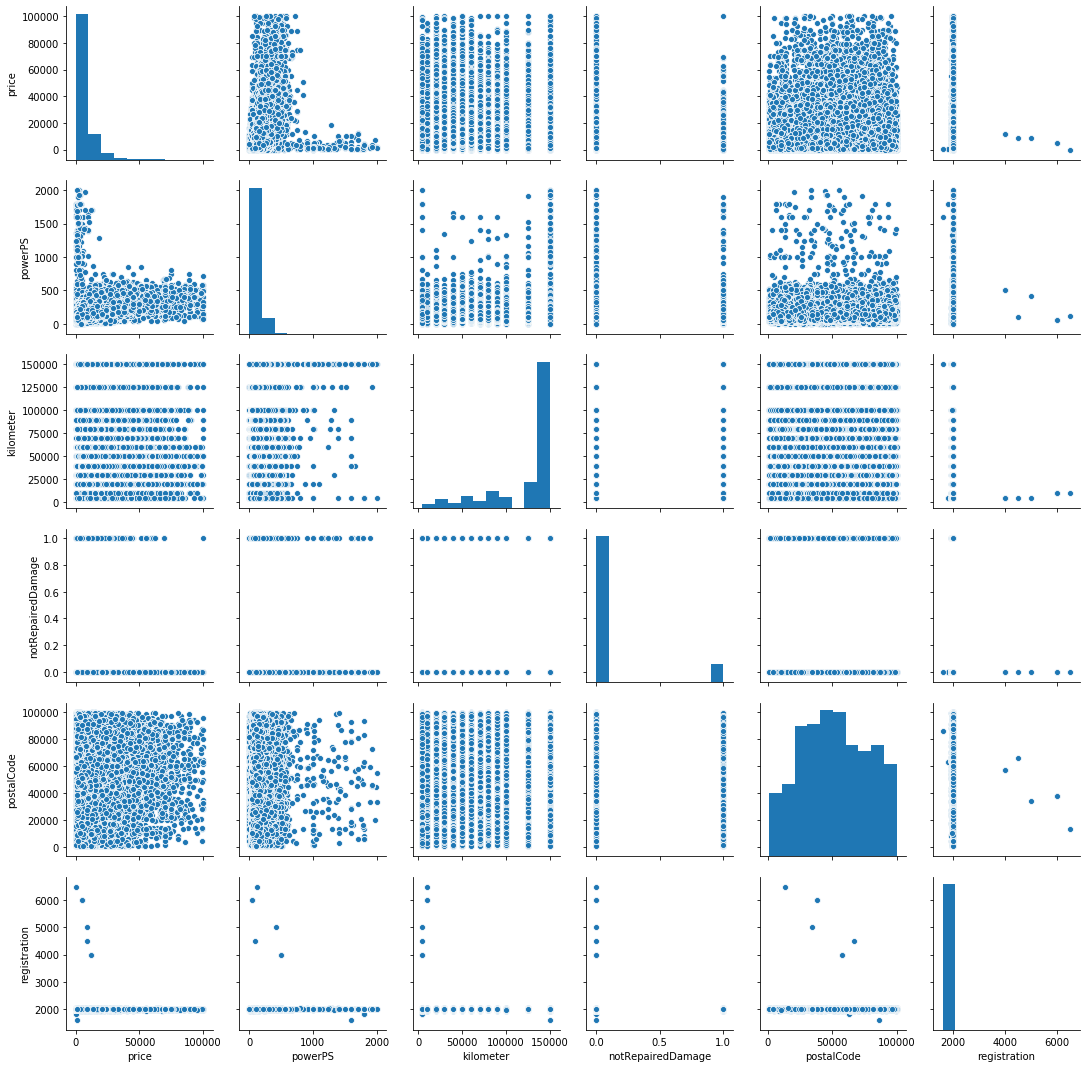

In [51]:
#second attempt at plotting the pair plots
g1 = sns.pairplot(df)

In [52]:
#we may use these plots to further filter
df = df[(df["price"] < 50000) & (df["powerPS"] < 500) & (df["registration"] <= 2018)]

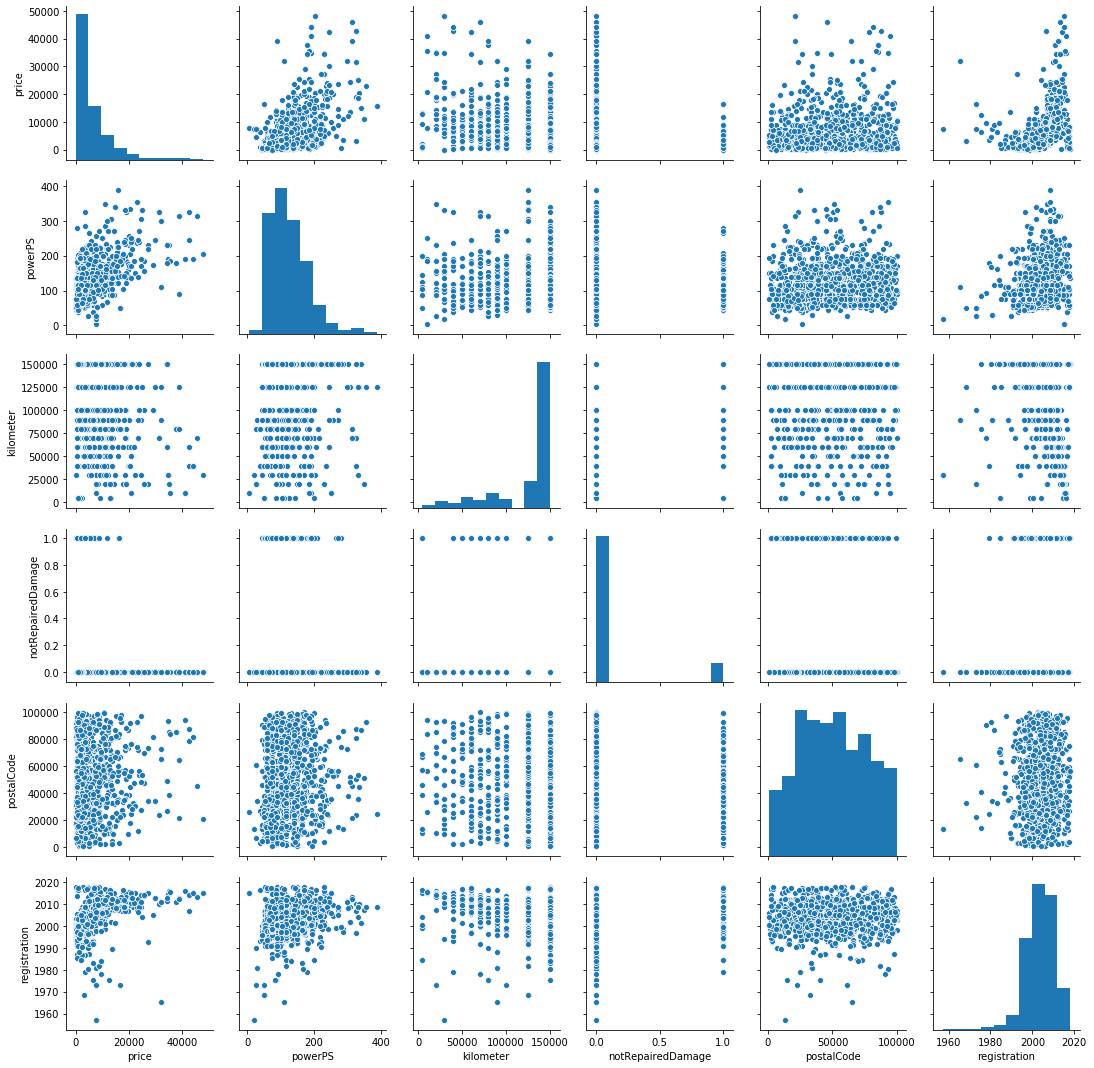

In [53]:
#we may downsample to accelerate the plotting for quicker inferences about what to filter
g2 = sns.pairplot(df.sample(1000))

### 4) Use colorization of the pair plots to look for interesting correlations in the data and gain an intuition

/Users/Andreas/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/Andreas/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/Andreas/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/Andreas/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **pas

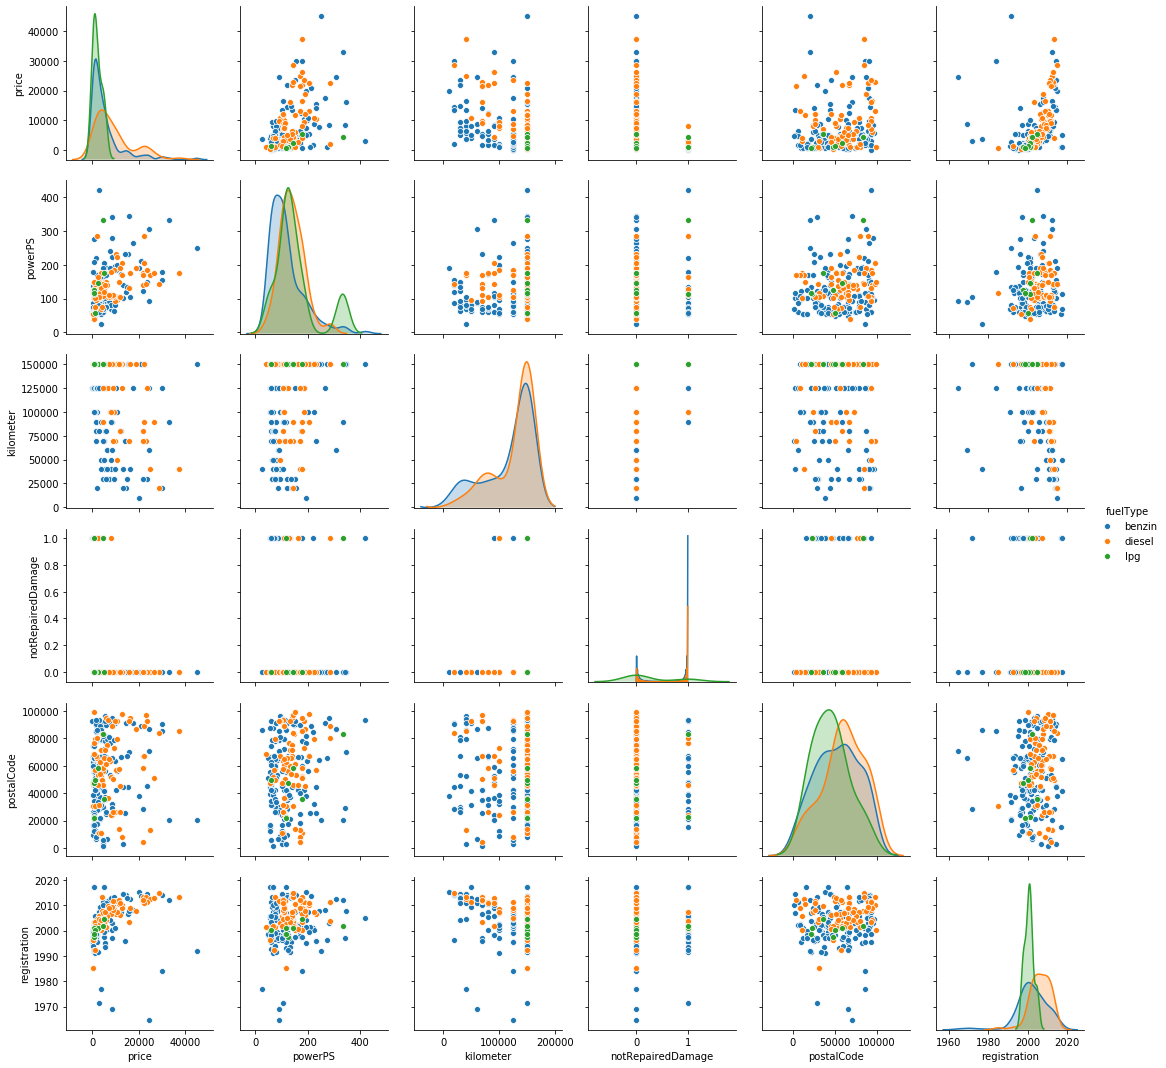

In [54]:
#colorize the "fuelType" for further analysis
g3 = sns.pairplot(df.sample(250), hue = "fuelType")

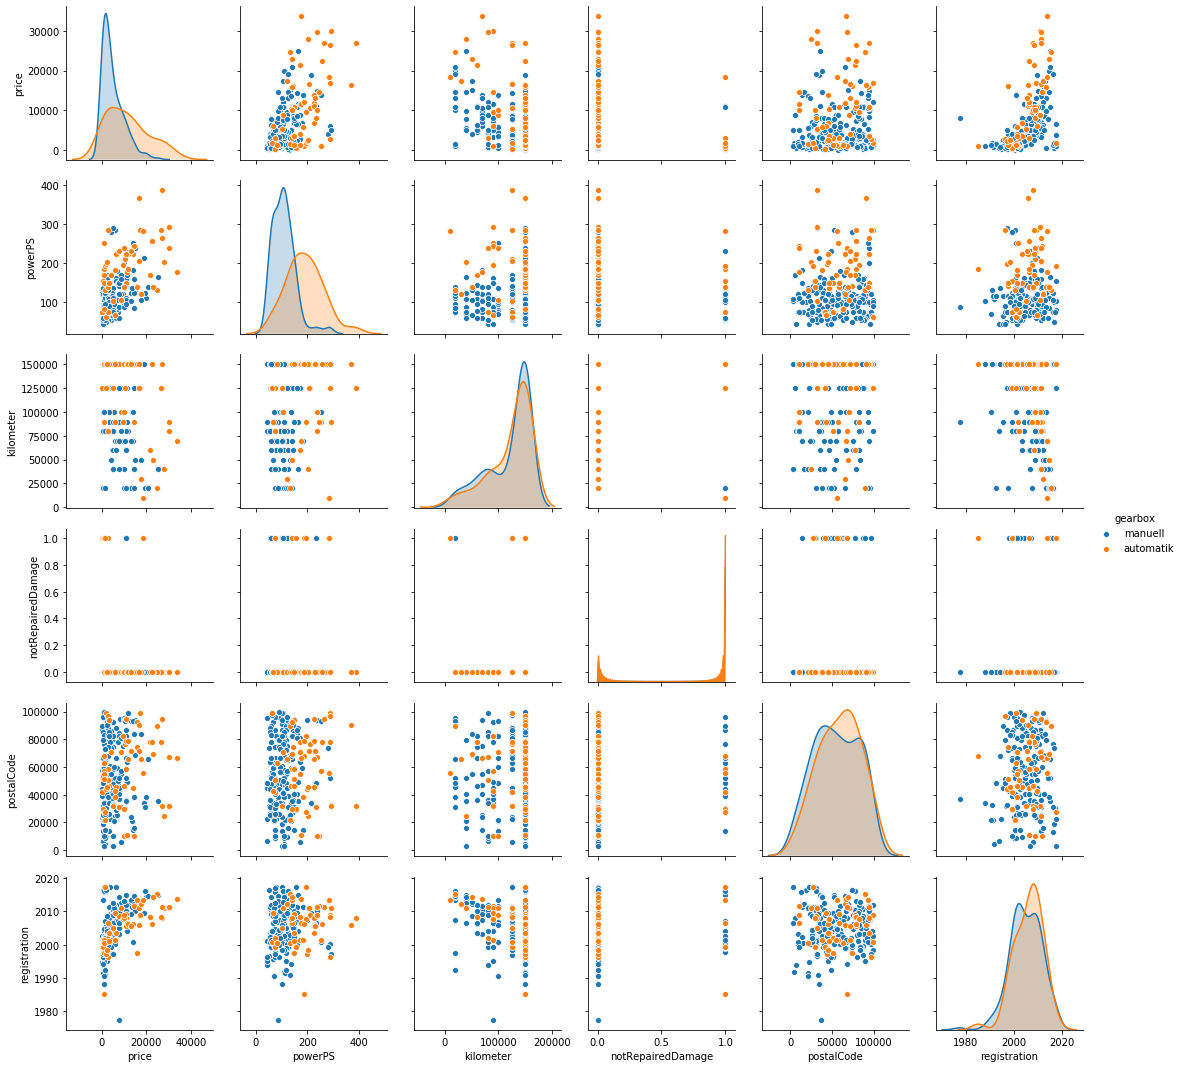

In [55]:
#colorize the "gearbox" for further analysis
g4 = sns.pairplot(df.sample(250), hue = "gearbox")

/Users/Andreas/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/Andreas/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/Andreas/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)


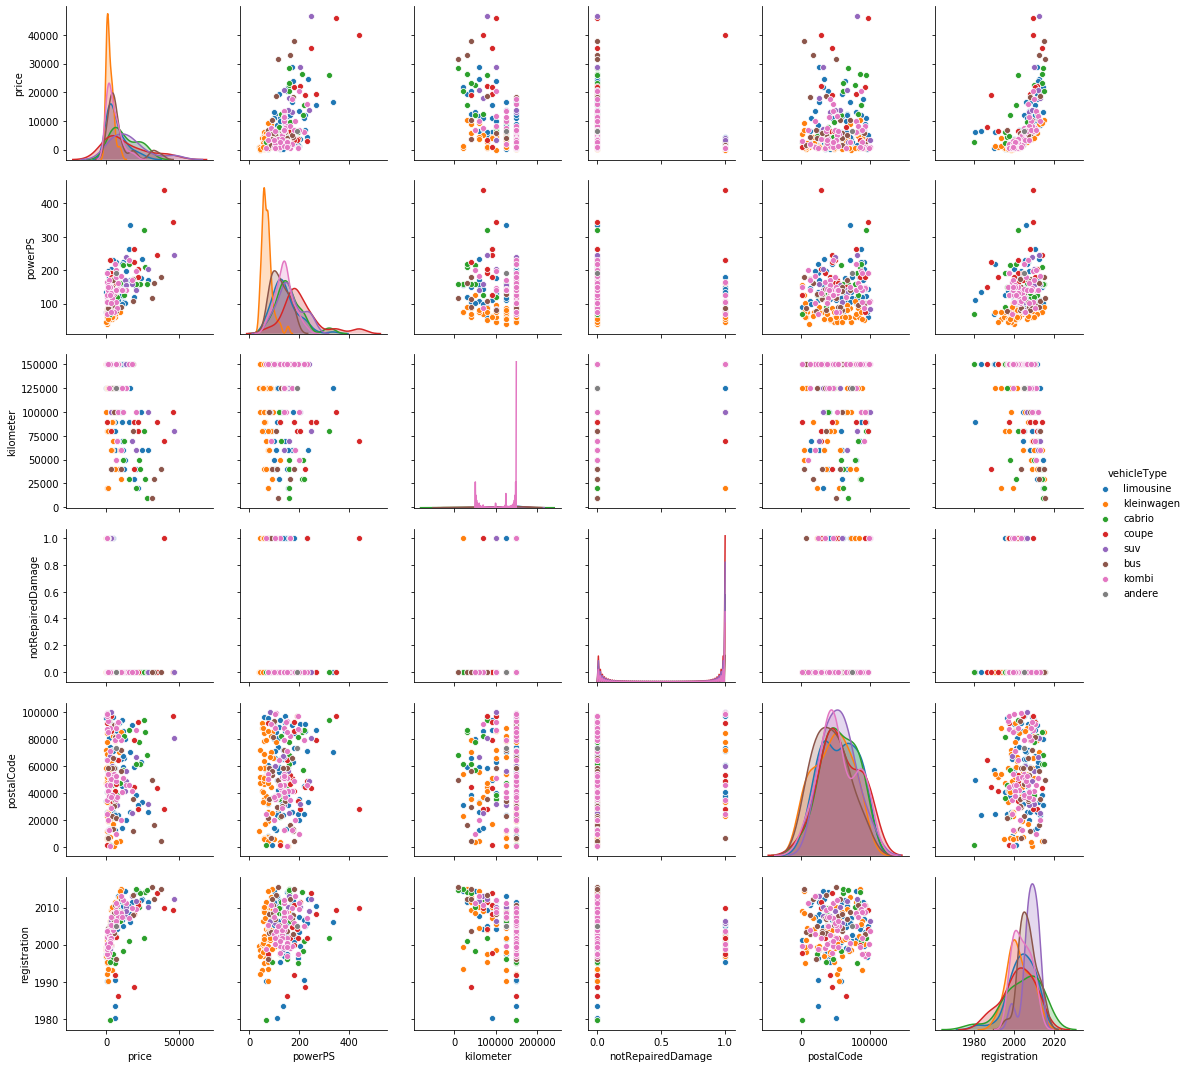

In [56]:
#colorize the "gearbox" for further analysis
g4 = sns.pairplot(df.sample(250), hue = "vehicleType")

### 5) Model building: Linear regression model on the filtered data

In [57]:
#import necessary packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import time

In [58]:
#define further data frame
#convert data in certain columns into dummy variables
#for more info, see e.g. https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40
df2 = pd.get_dummies(df, columns = ["vehicleType", "gearbox", "fuelType", "brand"]).drop(["model"], axis = 1)

#apply further filtering to downsize the data frame
df2 = df2[(df2["price"] > 500) & (df2["price"] < 20000)].sample(2000)

df2.head()

,name,price,powerPS,kilometer,notRepairedDamage,postalCode,registration,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,...,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo
29145,Opel_Astra_2.2_16V_Coupe,3800,147,125000,0,38304,2001.583333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53525,Alfa_Romeo_156_2.5_V6_24V,2880,190,125000,0,35633,1998.750000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210946,Mercedes_C_180_T_Kombi,650,122,150000,0,97490,1996.583333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18834,Golf_7_Comfortline_Life_mit_AHK.,13200,86,30000,0,26624,2013.250000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
153024,"BMW_525d_Aut._Edition_Voll_8xAlu_18""__Scheckhe...",17700,197,100000,0,53123,2009.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
print(df2.shape)

(2000, 64)


In [60]:
#define variables
X = df2.drop(["name", "price"], axis = 1)
Y = df2["price"]

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = .2)

In [62]:
#rescale training and test data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/Users/Andreas/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Andreas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  """
/Users/Andreas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  


In [63]:
#train linear regression model
from sklearn.linear_model import LinearRegression

start_time = time.time()

model = LinearRegression()
model.fit(X_train, Y_train) #train for less data

Y_predicted = model.predict(X_test)

#to check for over/underfitting
print("Training score: " + str(model.score(X_train, Y_train)))
print("Test score: " + str(model.score(X_test, Y_test)))

print("--- %s seconds ---" % (time.time() - start_time))

Training score: 0.6723279303624478
Test score: 0.6794932552243423
--- 0.010487079620361328 seconds ---


In [64]:
#print the coefficients of "y=a * x + b"
print("Intercept: " + str(model.intercept_))
print("Coef: " + str(model.coef_))

Intercept: 5502.873186197251
Coef: [ 1.81651065e+03 -1.91409541e+03 -4.87750809e+02  9.45631770e+01
  1.60167659e+03  2.71603869e+02  1.31034335e+03  1.39341264e+03
  1.05690348e+03  1.48684532e+03  1.33197130e+03  1.51111528e+03
  1.32384548e+03  7.61691742e+02  6.67667697e+02 -1.42443734e+02
 -3.63178781e+02 -7.77136904e+01  4.90379596e+02  1.70900856e+17
  1.33498094e+16 -1.14764801e+02  1.07867253e+14  3.61131374e+14
  3.79203982e+14  8.81840968e+13  6.24338598e+13  1.45592360e+14
  6.24338598e+13  6.24338598e+13  4.41750583e+13  2.06702248e+14
  2.94001914e+14  1.16436557e+14  1.42290026e+14  4.41750583e+13
  7.64176238e+13  1.16436557e+14  4.41750583e+13  5.40862450e+13
  4.41750583e+13  1.55054377e+14  3.92159580e+14  1.42290026e+14
  9.35039786e+13  1.51969863e+14  3.84270385e+14  2.02186558e+14
  4.41750583e+13  2.50427619e+14  3.12462554e+13  5.40862450e+13
  1.66786478e+14  1.77690911e+14  1.63937773e+14  1.16436557e+14
  5.40862450e+13  1.07867253e+14  1.66786478e+14  2.856

In [65]:
#train polynomial regression model
from sklearn.preprocessing import PolynomialFeatures

start_time = time.time()

pf = PolynomialFeatures(degree = 2, include_bias = False) #bias term not needed here
#need to fit the training data accordingly (demanded by sklearn) to adapt to polynomial fitting
pf.fit(X_train)

#generate new columns
X_train_transformed = pf.transform(X_train)
X_test_transformed = pf.transform(X_test)

#print all possible arrangements to get to a polynomial of degree 2 (as done by the transform method)
#print(pf.powers_) 

model = LinearRegression()
model.fit(X_train_transformed, Y_train)

print("Training score: " + str(model.score(X_train_transformed, Y_train)))
print("Test score: " + str(model.score(X_test_transformed, Y_test)))

print("--- %s seconds ---" % (time.time() - start_time))

Training score: 0.8752389881850756
Test score: -2.1344985725042095e+24
--- 2.643937110900879 seconds ---


The scores of the linear vs. polynomial regression suggest that the correlation in the data is in fact of linear type and thus better fitted/captured by the linear regression. The linear regression could potentially be further improved beyond the initial results by dropping additional columns and by limitting the amount of dummy variables.